# Лабораторная работа 02 (шкалы измерения)
## Задание 1: Определение типа шкалы измерения
Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

In [1]:
import numpy as np
import pandas as pd

# Загрузка данных
df = pd.read_csv('./data_21/train.csv')

# Просмотр первых строк данных
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_list = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']].values[0]
print(test_list)

interval_scale = [df['Fare'].values]
nominal_scale = [df['Sex'].values, df['Name'].values, df['Ticket'].values]
ordinal_scale = [df['Pclass'].values, df['PassengerId'].values]
ratio_scale = [df['Age'].values]

def type_of_scale(list):
    scales = []
    for i, element in enumerate(list):
        if np.isin(list[i], nominal_scale):
            scales.append('Номинальная шкала')
        elif np.isin(list[i], ordinal_scale) & isinstance(list[i], int):
            scales.append('Порядковая шкала')
        elif np.isin(list[i], interval_scale) & isinstance(list[i], float):
            scales.append('Интервальная шкала')
        elif np.isin(list[i], ratio_scale) & isinstance(list[i], float):
            scales.append('Шкала отношений')
        else: 
            scales.append('Иная шкала')
    
    return scales

print(type_of_scale(test_list))

[1 'male' 'Braund, Mr. Owen Harris' 22.0 'A/5 21171' 3 7.25]
['Порядковая шкала', 'Номинальная шкала', 'Номинальная шкала', 'Шкала отношений', 'Номинальная шкала', 'Порядковая шкала', 'Интервальная шкала']


## Задание 2: Приведение данных к нужной шкале
Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

In [3]:
def convert_scales(data):
    nominal = ['Name', 'Sex', 'Ticket']
    ordinal = ['PassengerId', 'Pclass']
    data = data.copy()
    for column in data.columns:
        if column in ordinal:
            data[column] = pd.Categorical(data[column], ordered=True)
        elif column in nominal:
            data[column] = pd.Categorical(data[column])
    return data

unconverted_dataframe = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']]
print('Тип данных:\n', unconverted_dataframe.dtypes)

converted_dataframe = convert_scales(unconverted_dataframe)
print('\nТип данных после преобразования:\n', converted_dataframe.dtypes)

Тип данных:
 PassengerId      int64
Sex             object
Name            object
Age            float64
Ticket          object
Pclass           int64
Fare           float64
dtype: object

Тип данных после преобразования:
 PassengerId    category
Sex            category
Name           category
Age             float64
Ticket         category
Pclass         category
Fare            float64
dtype: object


## Задание 3: Анализ данных с использованием различных шкал измерения
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

In [4]:
import statistics as st

# Выбираем интересующие нас столбцы
df_3 = df[['PassengerId', 'Sex', 'Name', 'Age', 'Ticket', 'Pclass', 'Fare']]

def analyze_data(data):
    # Результат будет храниться в словаре
    result = {}
    
    # Определяем столбцы по типам шкал
    nominal_columns = ['Sex', 'Name', 'Ticket']
    ordinal_columns = ['PassengerId', 'Pclass']
    
    # Создаём копию данных, чтобы не изменить исходный DataFrame
    data = data.copy()
    
    # Проходим по всем столбцам и вычисляем соответствующие статистики
    for column in data.columns:
        if column in nominal_columns:
            result[column] = st.mode(data[column])
        elif column in ordinal_columns:
            result[column] = st.median(data[column])
        else:
            result[column] = st.mean(data[column][~np.isnan(data[column])])
    
    return result

# Выводим результаты анализа
results = analyze_data(df_3)
for key, value in results.items():
    print(f'{key}: {value}')

# Дополнительные вычисления для отдельных столбцов
mode_sex = st.mode(df_3['Sex'])
print('Мода для шкалы "Пол":', mode_sex)

mean_age = st.mean(df_3['Age'][~np.isnan(df_3['Age'])])
print('Среднее значение для шкалы "Возраст":', mean_age)

median_class = st.median(df_3['Pclass'])
print('Медиана для шкалы "Класс":', median_class)

mean_fare = st.mean(df_3['Fare'])
print('Среднее значение для шкалы "Стоимость билета":', mean_fare)


PassengerId: 446
Sex: male
Name: Braund, Mr. Owen Harris
Age: 29.699117647058824
Ticket: 347082
Pclass: 3
Fare: 32.204207968574636
Мода для шкалы "Пол": male
Среднее значение для шкалы "Возраст": 29.699117647058824
Медиана для шкалы "Класс": 3
Среднее значение для шкалы "Стоимость билета": 32.204207968574636


## Задание 4: Визуализация данных в зависимости от шкалы измерения
Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

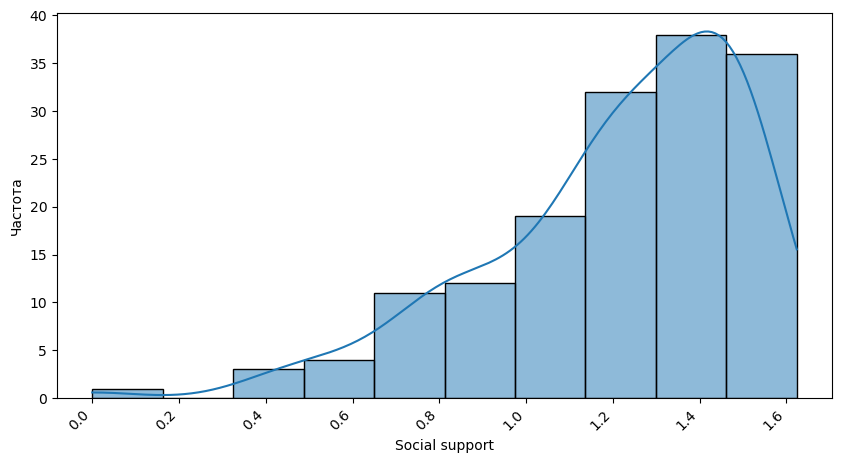

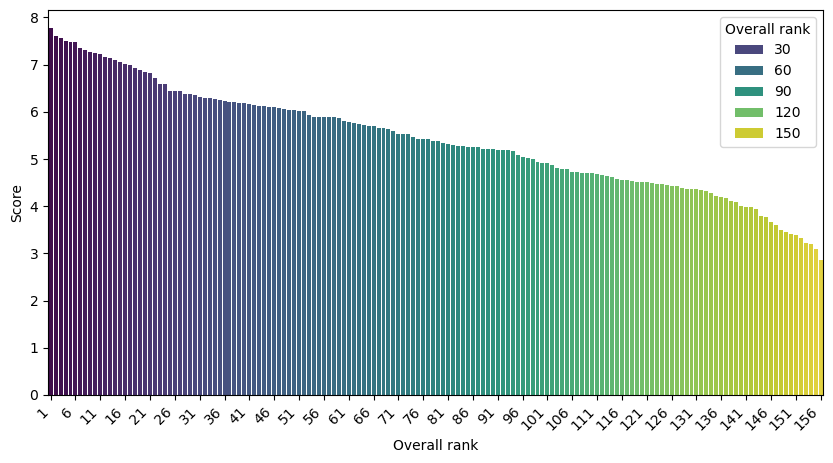

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

# Загрузка данных для анализа
df_4 = pd.read_csv('./data_24/2019.csv')

def plot_hist(x):
    plt.figure(figsize=(10, 5))
    sb.histplot(df_4[x], bins=10, kde=True)
    plt.xlabel(x)
    plt.ylabel('Частота')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_bar(x1, y1):
    plt.figure(figsize=(10, 5))
    sb.barplot(x=x1, y=y1, data=df_4, hue=x1, palette='viridis')
    plt.xlabel(x1)
    plt.ylabel(y1)
    plt.xticks(range(0, len(df_4[x1]), 5), rotation=45, ha='right')
    plt.show()

# Строим гистограмму и столбчатую диаграмму
plot_hist('Social support')
plot_bar(x1='Overall rank', y1='Score')

## Задание 5: Проверка гипотез
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.

T-статистика: 5.383245869828983
P-значение: 9.120185549328822e-08
Отвергаем нулевую гипотезу: есть различия между группами


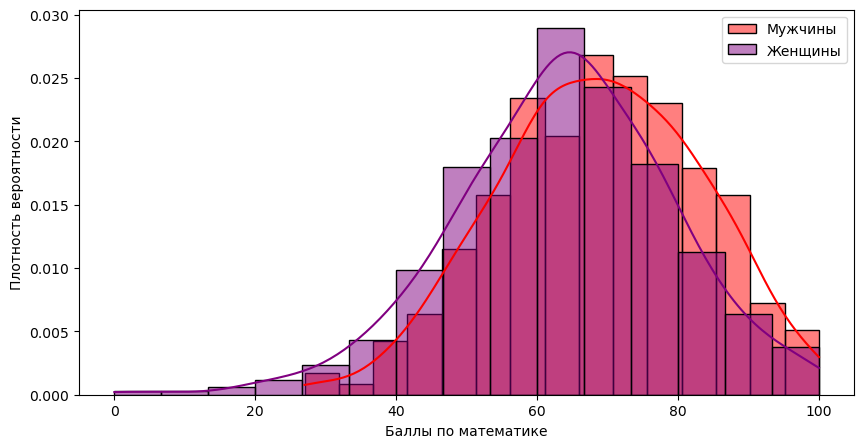

In [6]:
from scipy import stats

# Загрузка данных для анализа успеваемости студентов
dataframe_task5 = pd.read_csv('./data_25/StudentsPerformance.csv')

# Отбираем баллы по полу
math_scores_males = dataframe_task5[dataframe_task5['gender'] == 'male']['math score']
math_scores_females = dataframe_task5[dataframe_task5['gender'] == 'female']['math score']

# Применяем t-тест для независимых выборок
t_statistic, p_value = stats.ttest_ind(math_scores_males, math_scores_females)

# Выводим результаты
print(f"T-статистика: {t_statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результата
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: есть различия между группами")
else:
    print("Не отвергаем нулевую гипотезу: нет различий между группами")

# Строим гистограмму для распределений баллов
plt.figure(figsize=(10, 5))
sb.histplot(math_scores_males, color='red', label='Мужчины', kde=True, bins=15, stat="density")
sb.histplot(math_scores_females, color='purple', label='Женщины', kde=True, bins=15, stat="density")
plt.xlabel('Баллы по математике')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()